In [24]:
%load_ext autoreload
%autoreload
from environment import Acrobat
import actor
import critic
import agent

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
a = Acrobat()
fig, ax = a.create_figure()
a.render(fig, ax)

In [ ]:
env_aprox = Acrobat()

actor_aprox = actor.Actor(env_aprox.num_actions,
                          env_aprox.num_states,
                          learning_rate=0.005,
                          discount_factor=0.95,
                          expl_rate=0.005,
                          expl_decay=0.998,
                          trace_decay=0.95)

critic_nn = critic.Critic(len(env_aprox.get_state()), [20, 1], learning_rate=0.001, discount_factor=0.99)

agent_aprox = agent.Agent(env_aprox, critic_nn, actor_aprox)

train_history = agent_aprox.train(max_runs=100, max_length=300)

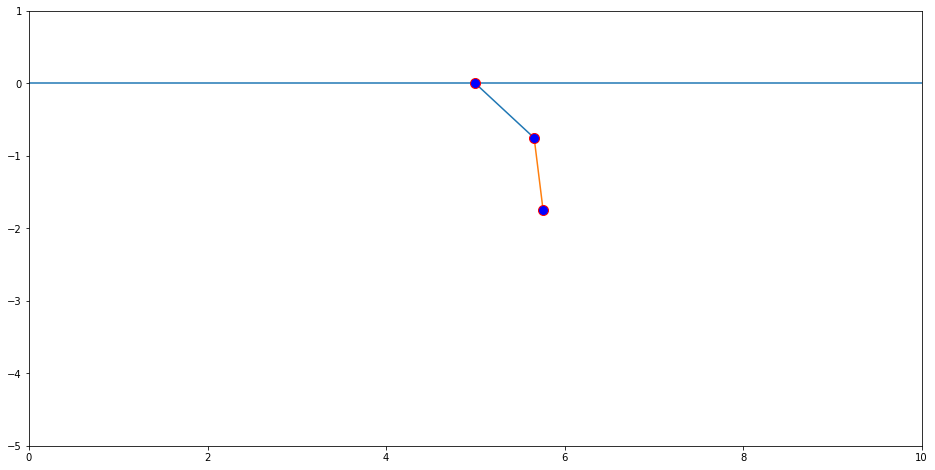

In [25]:
agent_aprox.render_episode()